# *

In [5]:
!pip install idx2numpy

# *data*

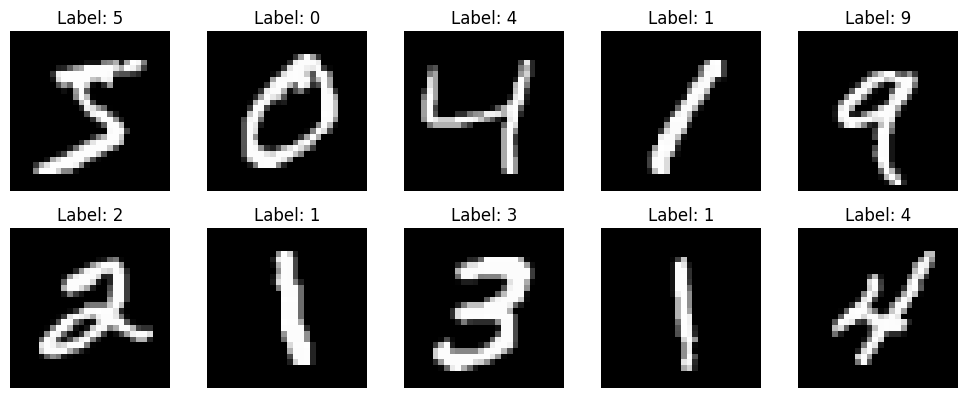

In [6]:
import idx2numpy
import matplotlib.pyplot as plt

# Load the .ubyte files
train_images = idx2numpy.convert_from_file('/content/train-images.idx3-ubyte')
train_labels = idx2numpy.convert_from_file('/content/train-labels.idx1-ubyte')
test_images = idx2numpy.convert_from_file('/content/t10k-images.idx3-ubyte')
test_labels = idx2numpy.convert_from_file('/content/t10k-labels.idx1-ubyte')

# Visualize some of the images
plt.figure(figsize=(10, 10))

for i in range(10):  # Visualize first 25 images
    plt.subplot(5, 5, i+1)
    plt.imshow(train_images[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [7]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [8]:
(x_train, y_train), (x_test, y_test) = (train_images, train_labels), (test_images, test_labels)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# Reshape the data to be 2D (from 28x28 to 784)
x_train = x_train.reshape(x_train.shape[0], 28*28)
x_test = x_test.reshape(x_test.shape[0], 28*28)

# Normalize the pixel values (0 to 255) to between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Split data into train/validation sets for some models
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train, y_train, test_size=0.2)

# **SVM**

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# SVM classifier
svm = SVC(kernel='linear')
svm.fit(x_train_split, y_train_split)

# Predictions
svm_pred = svm.predict(x_test)

# Accuracy
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy:.4f}")

SVM Accuracy: 0.9369


/usr/local/lib/python3.10/dist-packages/mlxtend/plotting/decision_regions.py:346: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  ax.scatter(


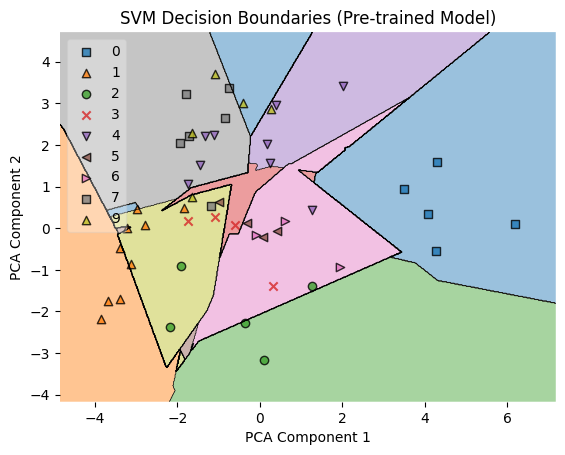

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from mlxtend.plotting import plot_decision_regions

# Reduce MNIST to 2D using PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(x_train_split[:50])  # Use first 10 samples
X_test_pca = pca.transform(x_test[:50])
y_train_subset = y_train_split[:50]
y_test_subset = y_test[:50]

# Fit an SVM classifier on the 2D PCA data
svm = SVC(kernel='linear')
svm.fit(X_train_pca, y_train_subset)

# Visualize decision boundaries using plot_decision_regions
plot_decision_regions(X_test_pca, y_test_subset.ravel(), clf=svm, legend=2)

# Add plot details
plt.title("SVM Decision Boundaries (Pre-trained Model)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [12]:
from sklearn.metrics import accuracy_score, mean_squared_error
# MSE
svm_mse = mean_squared_error(y_test, svm_pred)
print(f"SVM MSE: {svm_mse:.4f}")

SVM MSE: 1.0443


# **KNN**

In [13]:
from sklearn.neighbors import KNeighborsClassifier

# KNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train_split, y_train_split)

# Predictions
knn_pred = knn.predict(x_test)

# Accuracy
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy:.4f}")

KNN Accuracy: 0.9694


In [14]:
from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error
knn_mse = mean_squared_error(y_test, knn_pred)

print(f"Mean Squared Error (MSE): {knn_mse:.4f}")

Mean Squared Error (MSE): 0.6245


### **MLP**

In [15]:
from sklearn.neural_network import MLPClassifier

# MLP Classifier (Scikit-learn)
mlp = MLPClassifier(hidden_layer_sizes=(128, 64), activation='relu', max_iter=20)
mlp.fit(x_train_split, y_train_split)

# Predictions
mlp_pred = mlp.predict(x_test)

# Accuracy
mlp_accuracy = accuracy_score(y_test, mlp_pred)
print(f"MLP (Scikit-learn) Accuracy: {mlp_accuracy:.4f}")

MLP (Scikit-learn) Accuracy: 0.9771


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


# **keras**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8555 - loss: 0.4753 - val_accuracy: 0.9606 - val_loss: 0.1297
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9648 - loss: 0.1154 - val_accuracy: 0.9685 - val_loss: 0.1048
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9782 - loss: 0.0719 - val_accuracy: 0.9731 - val_loss: 0.0922
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9831 - loss: 0.0543 - val_accuracy: 0.9725 - val_loss: 0.0966
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9867 - loss: 0.0425 - val_accuracy: 0.9771 - val_loss: 0.0842
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9872 - loss: 0.0397 - val_accuracy: 0.9743 - val_loss: 0.0973
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9903 - loss: 0.0302 - val_accuracy: 0.9729 - val_loss: 0.1086
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9908 - loss: 0.0271 - 

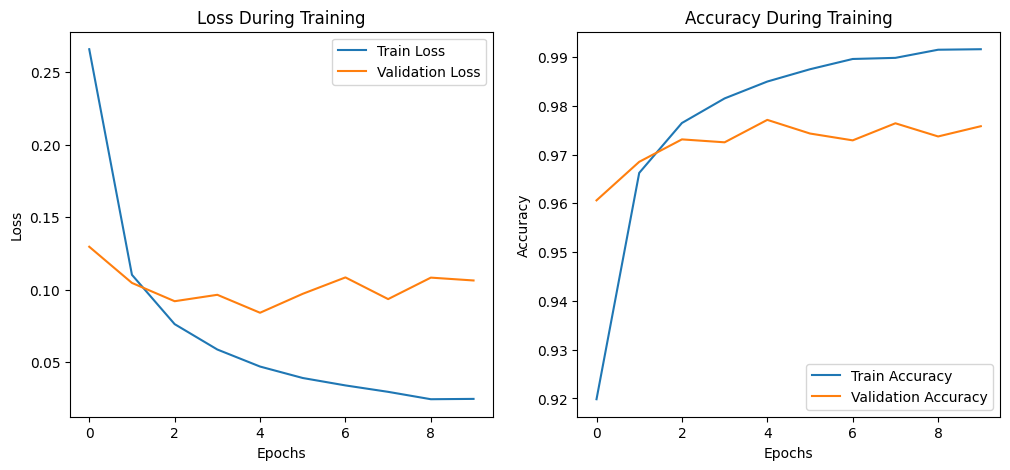

Final Test Accuracy: 0.9758


In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

# Define a simple MLP model for the MNIST dataset
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train_split.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and capture training history
history = model.fit(x_train_split, y_train_split, validation_data=(x_test, y_test), epochs=10)

# Plot loss
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy During Training')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()
test_loss, test_keras_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Final Test Accuracy: {test_keras_accuracy:.4f}')

# **PyTorch**

Epoch 1, Loss: 0.3832, Train Accuracy: 0.8933, Test Accuracy: 0.9411
Epoch 2, Loss: 0.1628, Train Accuracy: 0.9511, Test Accuracy: 0.9611
Epoch 3, Loss: 0.1126, Train Accuracy: 0.9663, Test Accuracy: 0.9670
Epoch 4, Loss: 0.0853, Train Accuracy: 0.9737, Test Accuracy: 0.9688
Epoch 5, Loss: 0.0664, Train Accuracy: 0.9795, Test Accuracy: 0.9738
Epoch 6, Loss: 0.0523, Train Accuracy: 0.9835, Test Accuracy: 0.9710
Epoch 7, Loss: 0.0425, Train Accuracy: 0.9862, Test Accuracy: 0.9760
Epoch 8, Loss: 0.0330, Train Accuracy: 0.9895, Test Accuracy: 0.9743
Epoch 9, Loss: 0.0284, Train Accuracy: 0.9910, Test Accuracy: 0.9748
Epoch 10, Loss: 0.0220, Train Accuracy: 0.9933, Test Accuracy: 0.9745


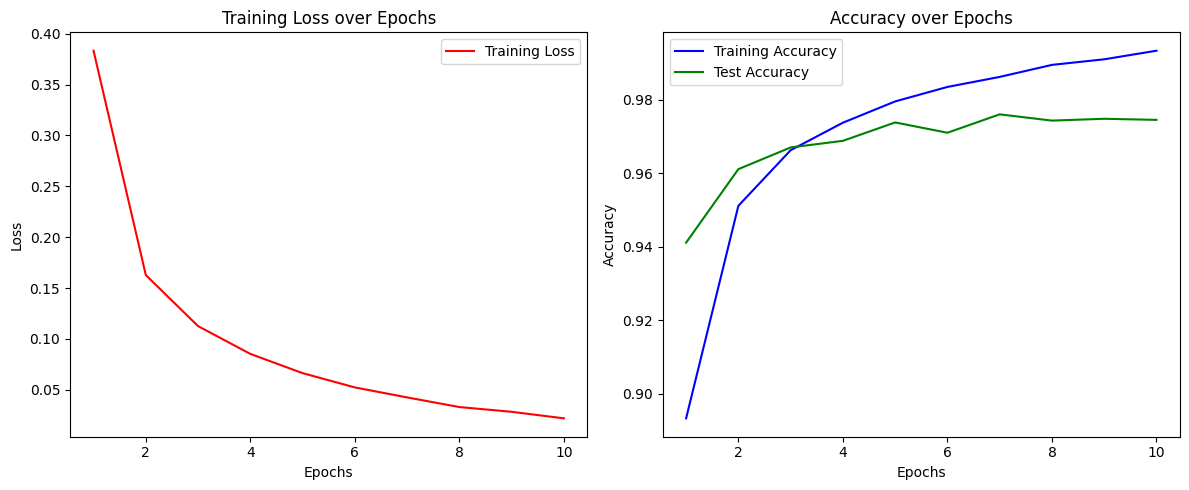

In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import matplotlib.pyplot as plt

# Convert to PyTorch tensors
x_train_tensor = torch.tensor(x_train_split, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_split, dtype=torch.long)
x_test_tensor = torch.tensor(x_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Create Dataloader
train_loader = DataLoader(TensorDataset(x_train_tensor, y_train_tensor), batch_size=64, shuffle=True)
test_loader = DataLoader(TensorDataset(x_test_tensor, y_test_tensor), batch_size=64, shuffle=False)

# Define a simple neural network model in PyTorch
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)  # Modify the input size if needed
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)  # Flatten input if image data
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Instantiate the model, define loss function and optimizer
model = SimpleNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Track loss and accuracy for visualization
train_losses = []
train_accuracies = []
test_accuracies = []

# Training loop
for epoch in range(10):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for images, labels in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

        # Accuracy calculation
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = correct / total

    # Append training loss and accuracy for each epoch
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_accuracy)

    # Evaluate on the test set
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            output = model(images)
            _, predicted = torch.max(output.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy = correct / total
    test_accuracies.append(test_accuracy)

    print(f"Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Train Accuracy: {epoch_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Plot loss and accuracy
epochs = range(1, 11)

plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_losses, 'r-', label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracies, 'b-', label='Training Accuracy')
plt.plot(epochs, test_accuracies, 'g-', label='Test Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [29]:
# Calculate the final test accuracy
final_test_accuracy = correct / total
print(f"Final PyTorch Accuracy: {final_test_accuracy:.4f}")

Final PyTorch Accuracy: 0.9745


# finel accuracy

In [30]:
print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"KNN Accuracy: {knn_accuracy:.4f}")
print(f"MLP (Scikit-learn) Accuracy: {mlp_accuracy:.4f}")
print(f"Keras Accuracy: {test_keras_accuracy:.4f}")
print(f"PyTorch Accuracy: {final_test_accuracy:.4f}")

SVM Accuracy: 0.9369
KNN Accuracy: 0.9694
MLP (Scikit-learn) Accuracy: 0.9771
Keras Accuracy: 0.9758
PyTorch Accuracy: 0.9745
